In [1]:
%cd ..

d:\work\ADASVehicleTracking


In [2]:
from GMM.coarse_clustering import run_GMM_clustering
from utils import props, show_image, get_cluster_images_separated, save_image_cmap

In [3]:
import numpy as np

In [4]:
filename = 'D:\work\ADASVehicleTracking\Data\DSC_1643.jpg'

In [5]:
num_of_clustering = 3

gmm_image = run_GMM_clustering(image_path = filename, k = num_of_clustering)

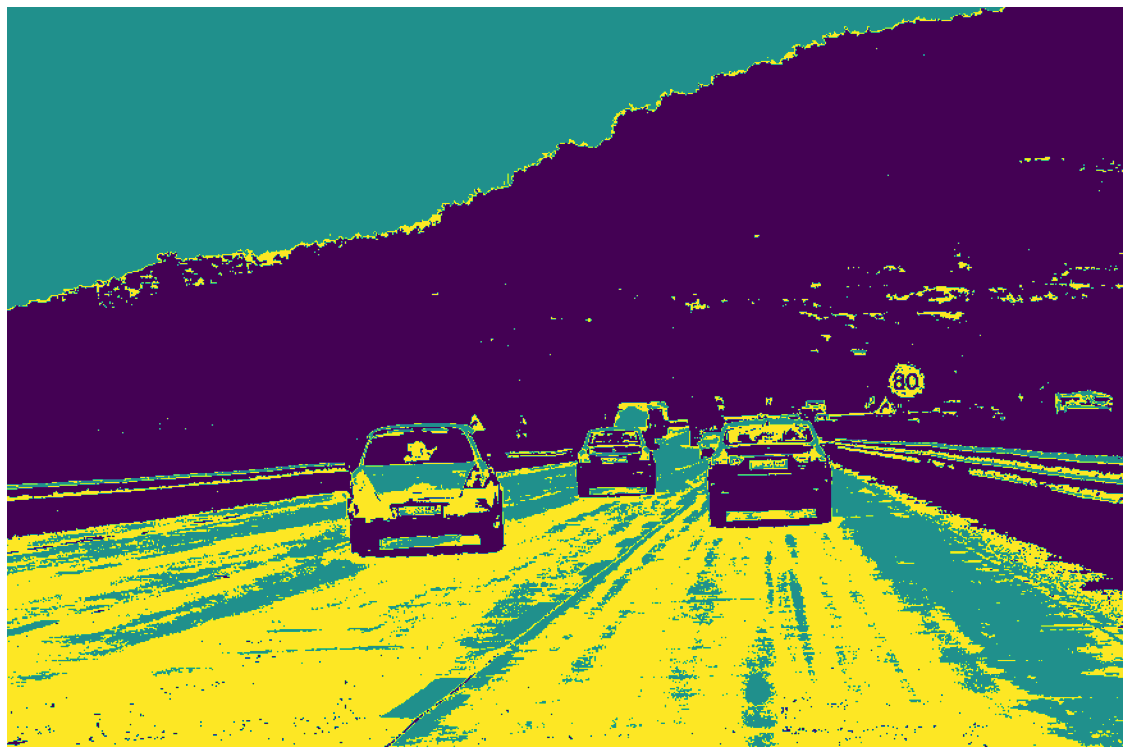

In [6]:
show_image(gmm_image, title = f"GMM_image_k_{num_of_clustering}")

In [7]:
save_image_cmap(image = gmm_image, title = f"GMM_image_k_{num_of_clustering}");
props(gmm_image, show_uniques=True)

Shape : (578, 872, 1) Maximum : 2 Minimum : 0 Data Type : uint8
Uniques : [0 1 2]


In [8]:
all_GMM_clustered_images = get_cluster_images_separated(gmm_image, save = True, prepend_save = f"GMM_image_k{num_of_clustering}_");

In [9]:
from CCL.fine_clustering import run_CCL_clustering, run_CCL_clustering_old

In [10]:
len(all_GMM_clustered_images)

3

In [11]:
all_CCL_clustered_images = list(map(lambda x: run_CCL_clustering_old(img_data = np.squeeze(x), convert_BGR2RGB=False), all_GMM_clustered_images))

In [12]:
len(all_CCL_clustered_images)

3

In [13]:
props(all_CCL_clustered_images[0])

Shape : (578, 872, 3) Maximum : 255 Minimum : 0 Data Type : uint8


Shape : (578, 872, 3) Maximum : 255 Minimum : 0 Data Type : uint8
Uniques : [  0   8  16  17  25  33  34  42  50  51  59  67  68  76  77  84  85  93
 101 102 110 118 119 127 135 136 144 145 152 153 161 162 169 170 178 186
 187 195 203 204 212 220 221 229 237 238 246 254 255]


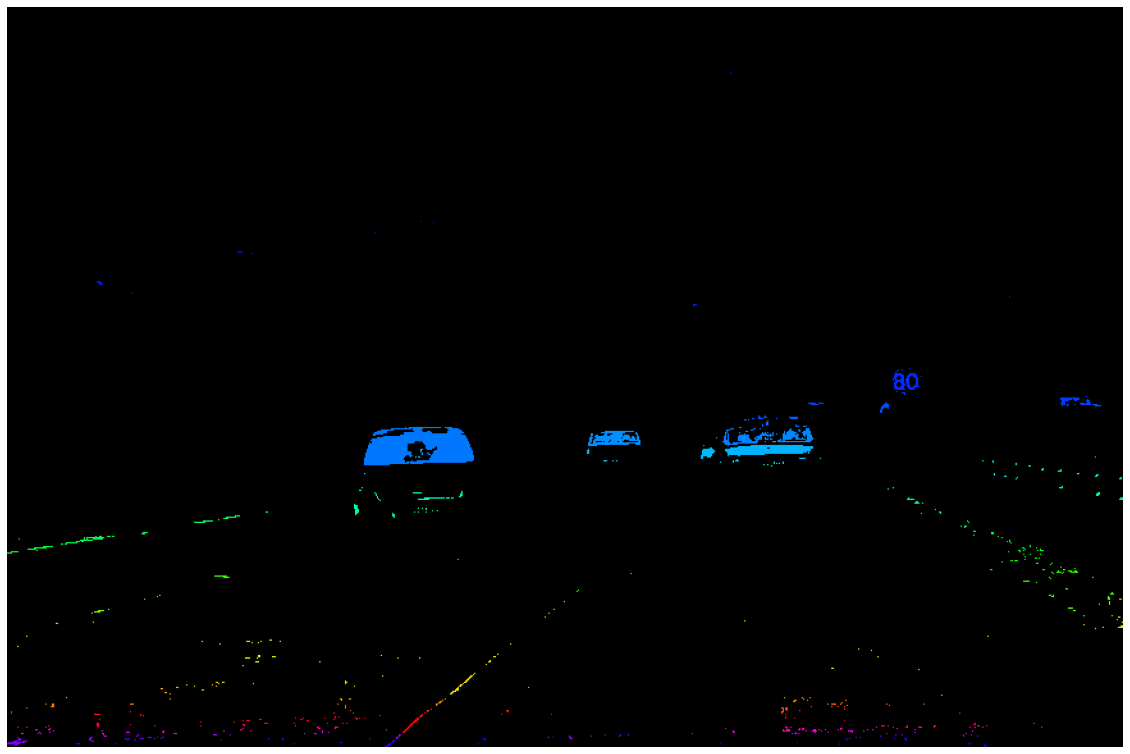

Shape : (578, 872, 3) Maximum : 255 Minimum : 0 Data Type : uint8
Uniques : [  0   8  16  17  25  33  34  42  50  51  59  60  67  68  76  84  85  93
 101 102 110 118 119 127 135 136 144 152 153 161 169 170 178 179 186 187
 195 196 203 204 212 213 220 221 229 237 238 246 247 254 255]


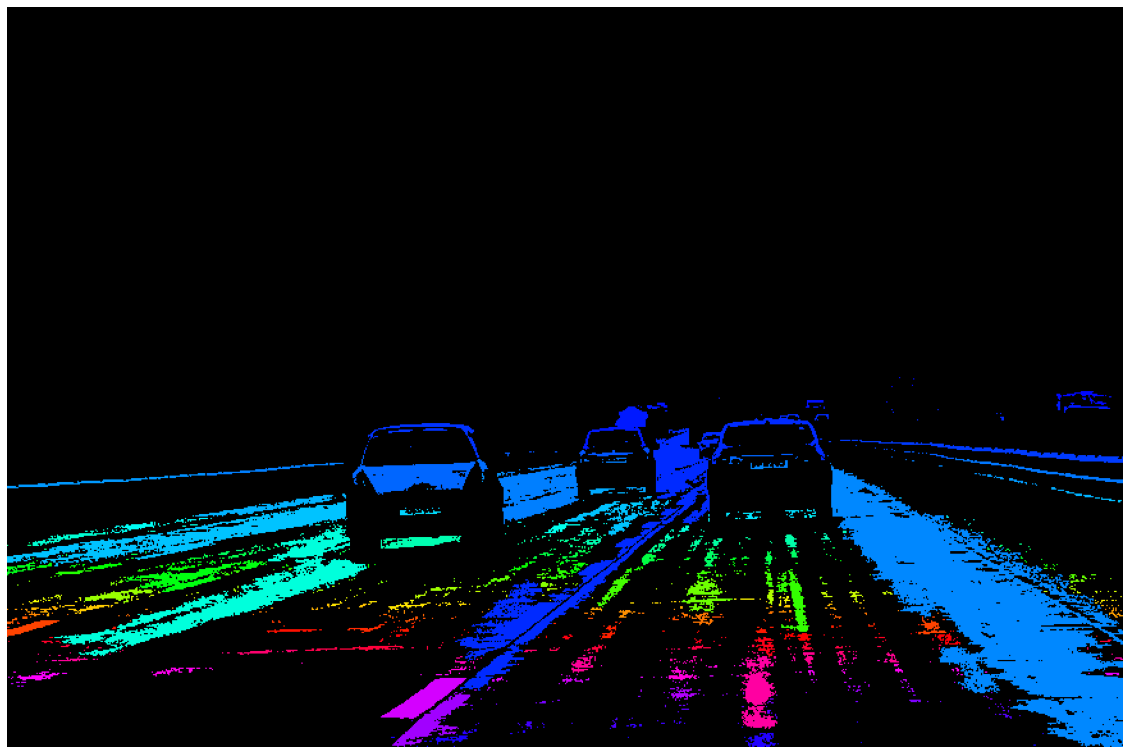

Shape : (578, 872, 3) Maximum : 255 Minimum : 0 Data Type : uint8
Uniques : [  0   8  16  17  25  26  33  34  42  43  50  51  59  60  67  68  76  84
  85  93  94 101 102 110 118 119 127 128 135 136 144 152 153 161 169 170
 178 179 186 187 195 203 204 212 220 221 229 237 238 246 254 255]


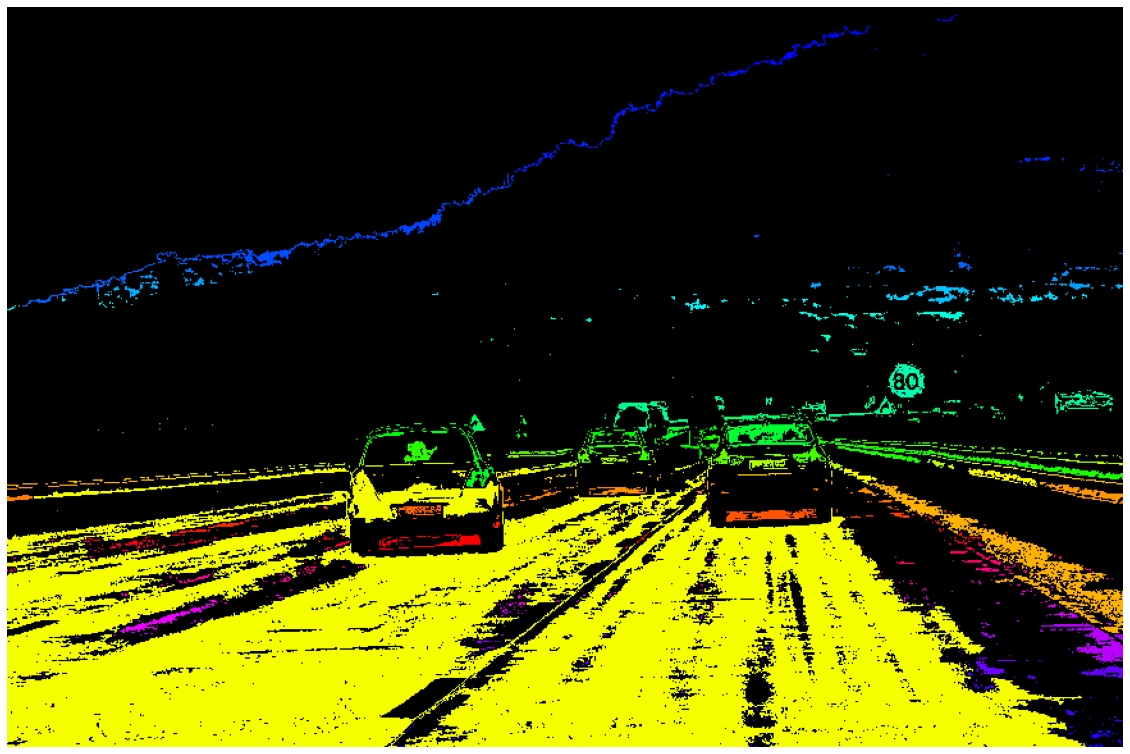

In [17]:
for each_image_index in range(len(all_CCL_clustered_images)):
    # print(each_image_index)
    each_image = all_CCL_clustered_images[each_image_index]
    # props(each_image, show_uniques=True) # Shape : (X, Y, 3) Maximum : 255 Minimum : 0 Data Type : uint8
    show_image(each_image, 
               title = f"CCL_image_cluster_{num_of_clustering}_{each_image_index}", 
               convert_BGR2RGB=False)